In [1]:
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt
import numpy as np

In [19]:
vae_dir = join(getcwd(), "vae") 
vae_small_dir = join(getcwd(), "vae_small") 

vae_data_dir = join(vae_dir, "data")
vae_small_dir_data = join(vae_small_dir, "data")

vae_img_dir = join(vae_dir, "img")
vae_small_dir_img = join(vae_small_dir, "img")

# Process Training Data VAE

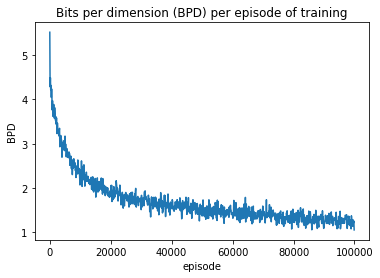

In [8]:
# Plot bits per dimension over training
bpd_train = np.genfromtxt(join(vae_data_dir, "train", "bpd-loss.csv"), skip_header=1, delimiter=",")
plt.plot(bpd_train[:,1], bpd_train[:,2])
plt.title("Bits per dimension (BPD) per episode of training")
plt.ylabel("BPD")
plt.xlabel("episode")
plt.savefig(join(vae_img_dir, "train", "bpd_plot.png") )
plt.show()


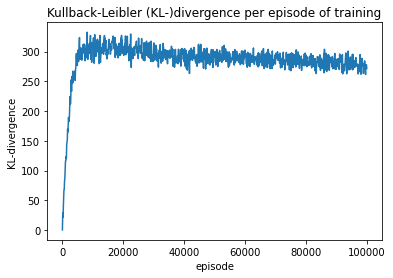

In [11]:
# Plot KL-Divergence over training
kl_train = np.genfromtxt(join(vae_data_dir, "train", "kl-loss.csv"), skip_header=1, delimiter=",")
plt.plot(kl_train[:,1], kl_train[:,2])
plt.title("Kullback-Leibler (KL-)divergence per episode of training")
plt.ylabel("KL-divergence")
plt.xlabel("episode")
plt.savefig(join(vae_img_dir, "train", "kl_plot.png") )
plt.show()

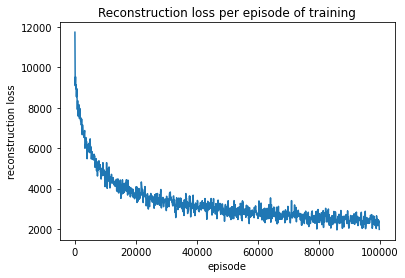

In [14]:
# Plot Reconstruction loss over training
recon_train = np.genfromtxt(join(vae_data_dir, "train", "recon-loss.csv"), skip_header=1, delimiter=",")
plt.plot(recon_train[:,1], recon_train[:,2])
plt.title("Reconstruction loss per episode of training")
plt.ylabel("reconstruction loss")
plt.xlabel("episode")
plt.savefig(join(vae_img_dir, "train", "recon_plot.png") )
plt.show()

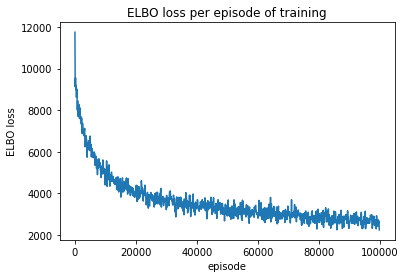

In [15]:
# Plot total ELBO loss over training
elbo_train = np.genfromtxt(join(vae_data_dir, "train", "total-loss.csv"), skip_header=1, delimiter=",")
plt.plot(elbo_train[:,1], elbo_train[:,2])
plt.title("ELBO loss per episode of training")
plt.ylabel("ELBO loss")
plt.xlabel("episode")
plt.savefig(join(vae_img_dir, "train", "elbo_plot.png") )
plt.show()

# Process validation data for VAE 

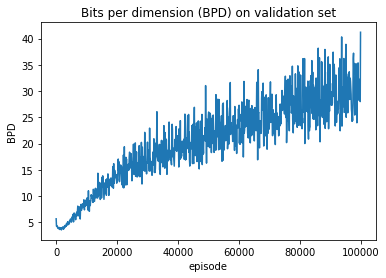

In [29]:
# Plot bits per dimension over training
bpd_test = np.genfromtxt(join(vae_data_dir, "test", "bpd-loss.csv"), skip_header=1, delimiter=",")
plt.plot(bpd_test[:,1], bpd_test[:,2])
plt.title("Bits per dimension (BPD) on validation set")
plt.ylabel("BPD")
plt.xlabel("episode")
plt.savefig(join(vae_img_dir, "test", "bpd_plot.png") )
plt.show()

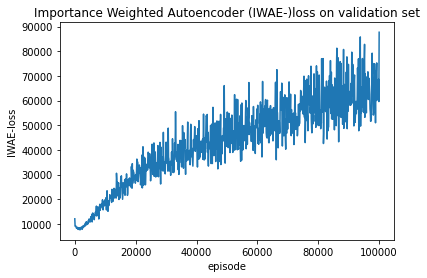

In [31]:
# Plot IWAE loss on validation set over training
iwae_test = np.genfromtxt(join(vae_data_dir, "test", "total-loss.csv"), skip_header=1, delimiter=",")
plt.plot(iwae_test[:,1], iwae_test[:,2])
plt.title("Importance Weighted Autoencoder (IWAE-)loss on validation set")
plt.ylabel("IWAE-loss")
plt.xlabel("episode")
plt.savefig(join(vae_img_dir, "test", "iwae_plot.png") )
plt.show()

# Process training data VAE Small

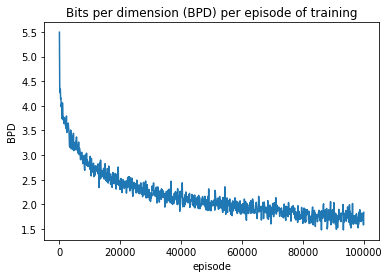

In [20]:
# Plot bits per dimension over training
bpd_train_small = np.genfromtxt(join(vae_small_dir_data, "train", "bpd-loss.csv"), skip_header=1, delimiter=",")
plt.plot(bpd_train_small[:,1], bpd_train_small[:,2])
plt.title("Bits per dimension (BPD) per episode of training")
plt.ylabel("BPD")
plt.xlabel("episode")
plt.savefig(join(vae_small_dir_img, "train", "bpd_plot.png") )
plt.show()

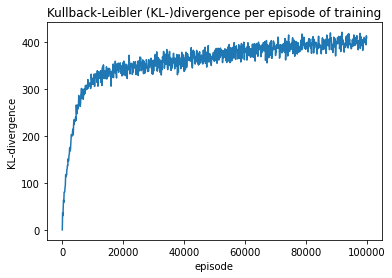

In [21]:
# Plot KL-divergence over training
kl_train_small = np.genfromtxt(join(vae_small_dir_data, "train", "kl-loss.csv"), skip_header=1, delimiter=",")
plt.plot(kl_train_small[:,1], kl_train_small[:,2])
plt.title("Kullback-Leibler (KL-)divergence per episode of training")
plt.ylabel("KL-divergence")
plt.xlabel("episode")
plt.savefig(join(vae_small_dir_img, "train", "kl_plot.png") )
plt.show()

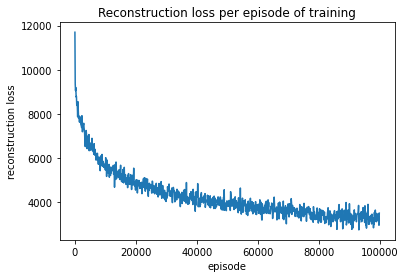

In [22]:
# Plot Reconstruction Loss over training
recon_train_small = np.genfromtxt(join(vae_small_dir_data, "train", "recon-loss.csv"), skip_header=1, delimiter=",")
plt.plot(recon_train_small[:,1], recon_train_small[:,2])
plt.title("Reconstruction loss per episode of training")
plt.ylabel("reconstruction loss")
plt.xlabel("episode")
plt.savefig(join(vae_small_dir_img, "train", "recon_plot.png") )
plt.show()

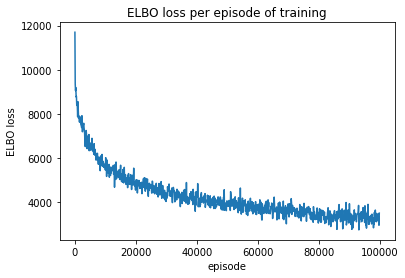

In [23]:
# Plot ELBO Loss over training
elbo_train_small = np.genfromtxt(join(vae_small_dir_data, "train", "total-loss.csv"), skip_header=1, delimiter=",")
plt.plot(recon_train_small[:,1], recon_train_small[:,2])
plt.title("ELBO loss per episode of training")
plt.ylabel("ELBO loss")
plt.xlabel("episode")
plt.savefig(join(vae_small_dir_img, "train", "elbo_plot.png") )
plt.show()

# Plot validation data for VAE-Small

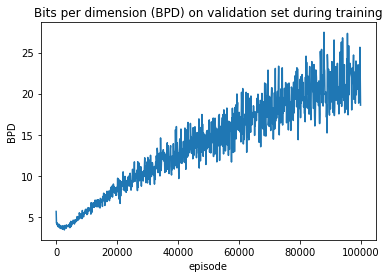

In [28]:
# Plot bits per dimension on validation set over training
bpd_test_small = np.genfromtxt(join(vae_small_dir_data, "test", "bpd-loss.csv"), skip_header=1, delimiter=",")
plt.plot(bpd_test_small[:,1], bpd_test_small[:,2])
plt.title("Bits per dimension (BPD) on validation set during training")
plt.ylabel("BPD")
plt.xlabel("episode")
plt.savefig(join(vae_small_dir_img, "test", "bpd_plot.png") )
plt.show()

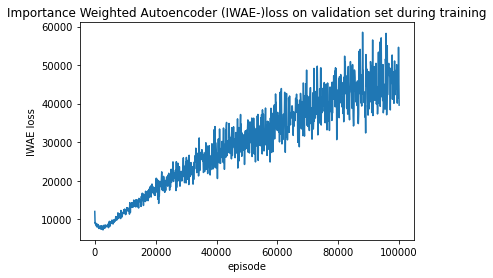

In [26]:
# Plot IWAE loss on validation set over training time
iwae_test_small = np.genfromtxt(join(vae_small_dir_data, "test", "total-loss.csv"), skip_header=1, delimiter=",")
plt.plot(iwae_test_small[:,1], iwae_test_small[:,2])
plt.title("Importance Weighted Autoencoder (IWAE-)loss on validation set during training")
plt.ylabel("IWAE loss")
plt.xlabel("episode")
plt.savefig(join(vae_small_dir_img, "test", "iwae_plot.png") )
plt.show()

In [62]:
import torch as t
import math
from torch import nn
from torch.nn import DataParallel
from torchvision import transforms, datasets

from dml import DiscretizedMixtureLogitsDistribution
from residual import Residual
from vnca import VNCA
from train import train
from data import PokemonIMG
from loss import elbo

In [63]:
z_size = 256
nca_hid = 128
n_mixtures = 1
batch_size = 32
dmg_size = 16
p_update = 1.0
min_steps, max_steps = 64, 128

filter_size = 5
pad = filter_size // 2
encoder_hid = 32
h = w = 32
n_channels = 3


def state_to_dist(state):
    return DiscretizedMixtureLogitsDistribution(n_mixtures, state[:, :n_mixtures * 10, :, :])


encoder = nn.Sequential(
    nn.Conv2d(n_channels, encoder_hid * 2 ** 0, filter_size, padding=pad), nn.ELU(),  # (bs, 32, h, w)
    nn.Conv2d(encoder_hid * 2 ** 0, encoder_hid * 2 ** 1, filter_size, padding=pad, stride=2), nn.ELU(),  # (bs, 64, h//2, w//2)
    nn.Conv2d(encoder_hid * 2 ** 1, encoder_hid * 2 ** 2, filter_size, padding=pad, stride=2), nn.ELU(),  # (bs, 128, h//4, w//4)
    nn.Conv2d(encoder_hid * 2 ** 2, encoder_hid * 2 ** 3, filter_size, padding=pad, stride=2), nn.ELU(),  # (bs, 256, h//8, w//8)
    nn.Conv2d(encoder_hid * 2 ** 3, encoder_hid * 2 ** 4, filter_size, padding=pad, stride=2), nn.ELU(),  # (bs, 512, h//16, w//16),
    nn.Flatten(),  # (bs, 512*h//16*w//16)
    nn.Linear(encoder_hid * (2 ** 4) * h // 16 * w // 16, 2 * z_size),
)

update_net = nn.Sequential(
    nn.Conv2d(z_size, nca_hid, 3, padding=1),
    Residual(
        nn.Conv2d(nca_hid, nca_hid, 1),
        nn.ELU(),
        nn.Conv2d(nca_hid, nca_hid, 1),
    ),
    Residual(
        nn.Conv2d(nca_hid, nca_hid, 1),
        nn.ELU(),
        nn.Conv2d(nca_hid, nca_hid, 1),
    ),
    Residual(
        nn.Conv2d(nca_hid, nca_hid, 1),
        nn.ELU(),
        nn.Conv2d(nca_hid, nca_hid, 1),
    ),
    Residual(
        nn.Conv2d(nca_hid, nca_hid, 1),
        nn.ELU(),
        nn.Conv2d(nca_hid, nca_hid, 1),
    ),
    nn.Conv2d(nca_hid, z_size, 1)
)
update_net[-1].weight.data.fill_(0.0)
update_net[-1].bias.data.fill_(0.0)

# encoder = DataParallel(encoder)
# update_net = DataParallel(update_net)

dset = PokemonIMG()

num_samples = len(dset)
train_split = 0.7
val_split = 0.2
test_split = 0.1

num_train = math.floor(num_samples*train_split)
num_val = math.floor(num_samples*val_split)
num_test = math.floor(num_samples*test_split)
num_test = num_test + (num_samples - num_train - num_val - num_test)

train_set, val_set, test_set = t.utils.data.random_split(dset, [num_train, num_val, num_test])

vnca = VNCA(h, w, n_channels, z_size, encoder, update_net, train_set, val_set, test_set, state_to_dist, batch_size, dmg_size, p_update, min_steps, max_steps)


VNCA(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ELU(alpha=1.0)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (3): ELU(alpha=1.0)
    (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (5): ELU(alpha=1.0)
    (6): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (7): ELU(alpha=1.0)
    (8): Conv2d(256, 512, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (9): ELU(alpha=1.0)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=2048, out_features=512, bias=True)
  )
  (nca): NCA(
    (update_net): Sequential(
      (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Residual(
        (delegate): Sequential(
          (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
          (1): ELU(alpha=1.0)
          (2): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
        )
      )
 

In [64]:
os.listdir(os.path.join(os.getcwd(), "..", "..", "vnca", "tasks", "pokemon"))

['best',
 'data.py',
 'data_store',
 'latest',
 'main copy.py',
 'main.py',
 'TBtest',
 'TBtrain',
 'test.ipynb',
 '__pycache__']

In [65]:
param_path = os.path.join(os.getcwd(), "..", "..", "vnca", "tasks", "pokemon", "latest")

In [66]:
vnca.load(param_path)

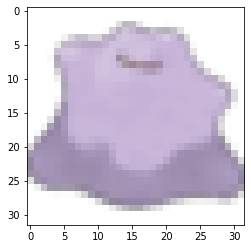

In [67]:
plt.imshow(dset.find("132.png")[0].permute(1, 2, 0))

In [14]:
test_img = dset.find("132.png")[0]
print(test_img.shape)
test_img = test_img.unsqueeze(0)
print(test_img.shape)

torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])


In [15]:
loss, z, p_x_given_z, recon_loss, kl_loss, states = vnca.forward(test_img, 1, elbo)

shape of z torch.Size([1, 1, 256])
reshape 1: torch.Size([1, 256])
reshape 2: torch.Size([1, 256, 1])
reshape 3: torch.Size([1, 256, 1, 1])
reshape 4: torch.Size([1, 256, 32, 32])
shape of the state to propagate torch.Size([1, 256, 32, 32])


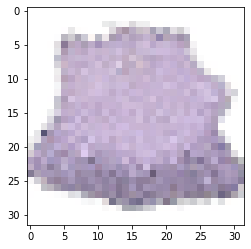

In [16]:
#img = vnca.to_rgb(states[-1].cpu().detach())
#print(img.shape)
plt.imshow(vnca.to_rgb(states[-1].cpu().detach())[0].squeeze().permute(1,2,0).cpu().detach()) 

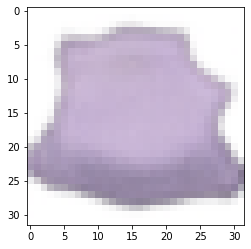

In [17]:
plt.imshow(vnca.to_rgb(states[-1].cpu().detach())[1].squeeze().permute(1,2,0).cpu().detach()) 

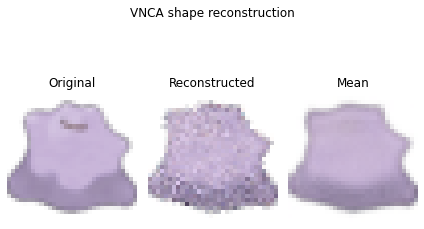

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('VNCA shape reconstruction')
ax1.imshow(dset.find("132.png")[0].permute(1, 2, 0))
ax1.axis('off')
ax1.title.set_text("Original")
ax2.imshow(vnca.to_rgb(states[-1].cpu().detach())[0].squeeze().permute(1,2,0).cpu().detach())
ax2.axis('off')
ax2.title.set_text("Reconstructed")
ax3.imshow(vnca.to_rgb(states[-1].cpu().detach())[1].squeeze().permute(1,2,0).cpu().detach())
ax3.axis('off')
ax3.title.set_text("Mean")
fig.tight_layout()

In [22]:
samples = vnca.p_z.sample((8,)).view(8, -1, 1, 1).expand(8, -1, vnca.h, vnca.w).to(vnca.device)
states = vnca.decode(samples)
samples, samples_means = vnca.to_rgb(states[-1])

c:\Users\jsche\anaconda3\envs\torch\lib\site-packages\torch\utils\checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
c:\Users\jsche\anaconda3\envs\torch\lib\site-packages\torch\distributions\distribution.py:44: UserWarning: <class 'dml.DiscretizedMixtureLogitsDistribution'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


In [23]:
print(samples.shape)

torch.Size([8, 3, 32, 32])


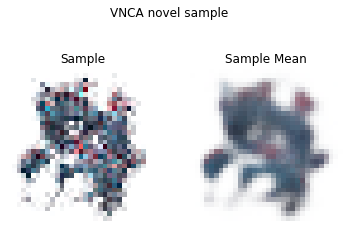

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('VNCA novel sample')
ax1.imshow(samples[0].permute(1, 2, 0).cpu().detach())
ax1.axis('off')
ax1.title.set_text("Sample")
ax2.imshow(samples_means[0].permute(1,2,0).cpu().detach())
ax2.axis('off')
ax2.title.set_text("Sample Mean")

In [39]:
from skimage import io
from PIL import Image
from torchvision import transforms

In [69]:
def to_alpha(x):
  return t.clip(x[3:4,...], 0.0, 1.0)

def to_rgb(x):
  # assume rgb premultiplied by alpha
  rgb, a = x[:3,...], to_alpha(x)
  return 1.0-a+rgb

In [71]:
img_name = os.path.join(os.getcwd(), "pikachu2.png")
print(io.imread(img_name).shape)
image = dset.transform(Image.fromarray(io.imread(img_name)))
image[:3,...] *= image[3:,...]
print(image.shape)
image = to_rgb(image)
print(image.shape)

(854, 1138, 4)
torch.Size([4, 32, 32])
torch.Size([3, 32, 32])


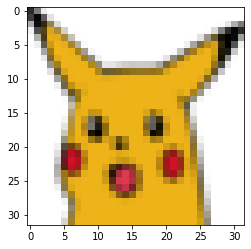

In [72]:
plt.imshow(image.permute(1, 2, 0))

In [73]:
test_img = image.unsqueeze(0)

In [74]:
loss, z, p_x_given_z, recon_loss, kl_loss, states = vnca.forward(test_img, 1, elbo)

shape of z torch.Size([1, 1, 256])
reshape 1: torch.Size([1, 256])
reshape 2: torch.Size([1, 256, 1])
reshape 3: torch.Size([1, 256, 1, 1])
reshape 4: torch.Size([1, 256, 32, 32])
shape of the state to propagate torch.Size([1, 256, 32, 32])


c:\Users\jsche\anaconda3\envs\torch\lib\site-packages\torch\distributions\distribution.py:44: UserWarning: <class 'dml.DiscretizedMixtureLogitsDistribution'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


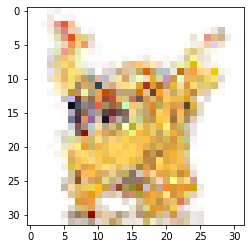

In [75]:
plt.imshow(vnca.to_rgb(states[-1].cpu().detach())[0].squeeze().permute(1,2,0).cpu().detach()) 

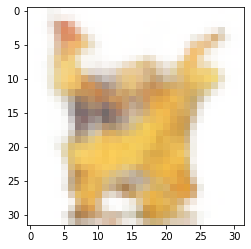

In [76]:
plt.imshow(vnca.to_rgb(states[-1].cpu().detach())[1].squeeze().permute(1,2,0).cpu().detach()) 

In [79]:
img_name = os.path.join(os.getcwd(), "pikachu3.png")
print(io.imread(img_name).shape)
image = dset.transform(Image.fromarray(io.imread(img_name)))
image[:3,...] *= image[3:,...]
print(image.shape)
image = to_rgb(image)
print(image.shape)

(223, 226, 4)
torch.Size([4, 32, 32])
torch.Size([3, 32, 32])


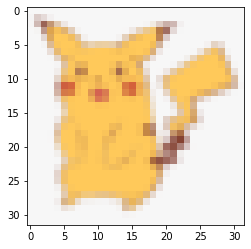

In [80]:
plt.imshow(image.permute(1, 2, 0))

In [81]:
test_img = image.unsqueeze(0)

In [82]:
loss, z, p_x_given_z, recon_loss, kl_loss, states = vnca.forward(test_img, 1, elbo)

shape of z torch.Size([1, 1, 256])
reshape 1: torch.Size([1, 256])
reshape 2: torch.Size([1, 256, 1])
reshape 3: torch.Size([1, 256, 1, 1])
reshape 4: torch.Size([1, 256, 32, 32])
shape of the state to propagate torch.Size([1, 256, 32, 32])


c:\Users\jsche\anaconda3\envs\torch\lib\site-packages\torch\distributions\distribution.py:44: UserWarning: <class 'dml.DiscretizedMixtureLogitsDistribution'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


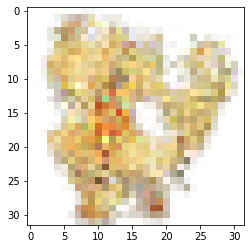

In [83]:
plt.imshow(vnca.to_rgb(states[-1].cpu().detach())[0].squeeze().permute(1,2,0).cpu().detach()) 

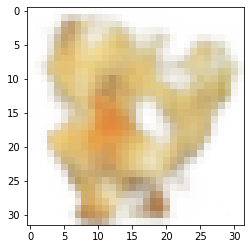

In [84]:
plt.imshow(vnca.to_rgb(states[-1].cpu().detach())[1].squeeze().permute(1,2,0).cpu().detach()) 

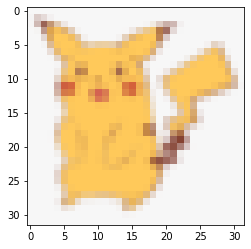

In [85]:
plt.imshow(test_img[0].permute(1, 2, 0))